# **OVERFITTING AND PRUNING**

Overfitting is a condition when model fits training data too well and fails to generalise and its performance on the test set.


In [1]:
#Importing necessary libraries 

import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
# import the dataset
dataset = load_breast_cancer()
#print(dataset.DESCR)
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.DataFrame(dataset.target, columns=["target"])

In [3]:
# Split the given data into 80 percent training data and 20 percent testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 11, test_size=0.2)

In [4]:
clf = DecisionTreeClassifier(random_state = 0)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.956140350877193


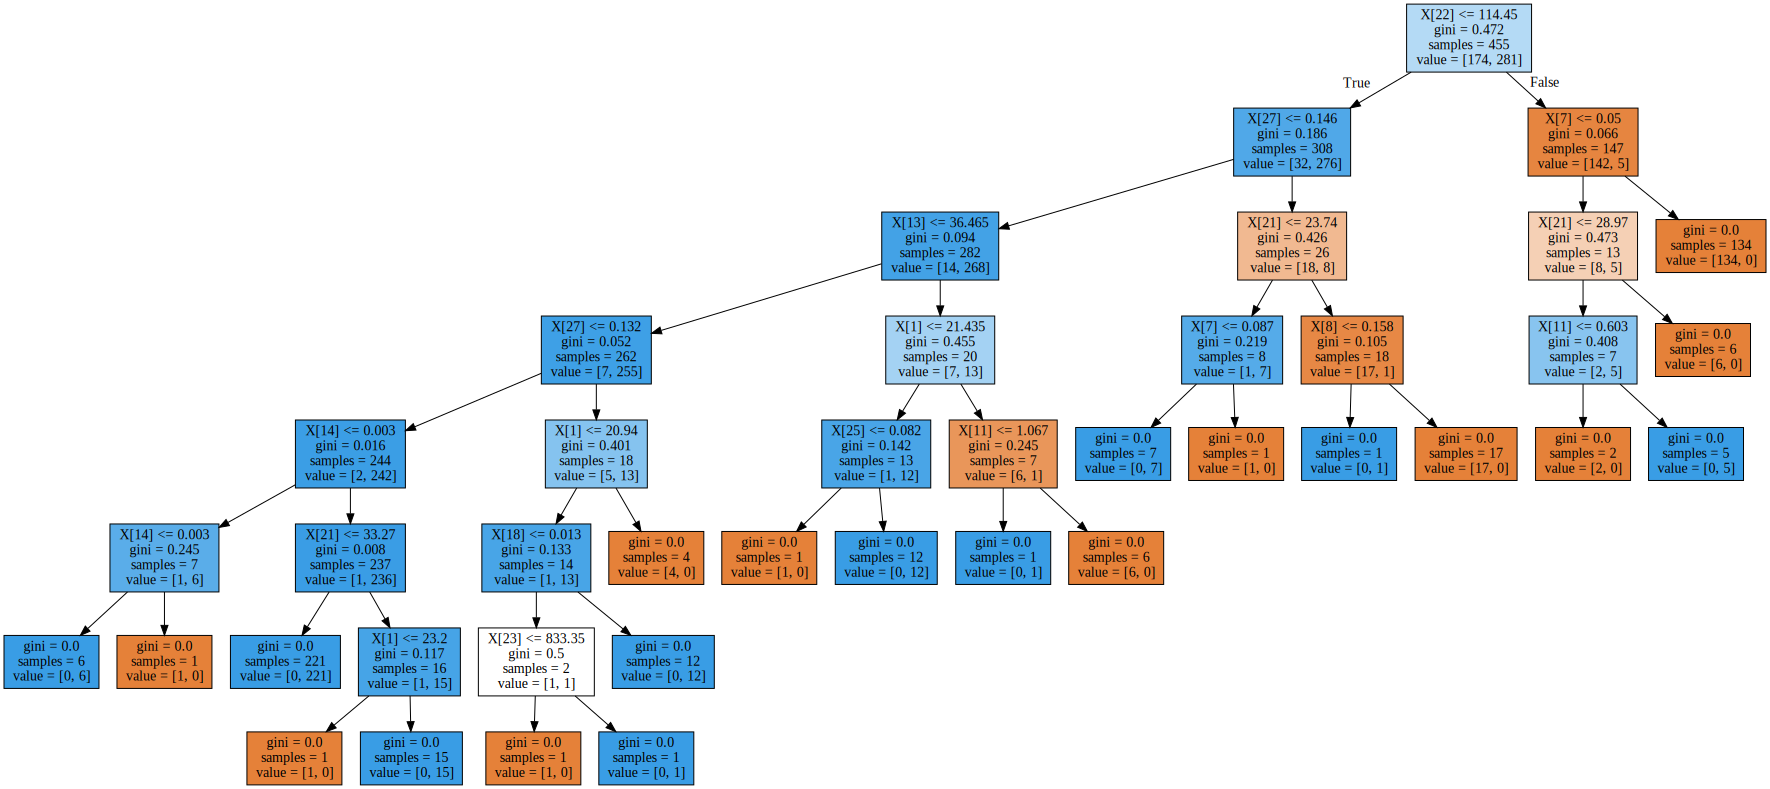

In [5]:
import graphviz
dot_data = tree.export_graphviz(clf, filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [6]:
train_accuracy = []
test_accuracy = []
for depth in range(1,11):
    dt = DecisionTreeClassifier(max_depth = depth, random_state = 11)
    dt = dt.fit(x_train, y_train)
    y_pred_train = dt.predict(x_train)
    y_pred_test = dt.predict(x_test)
    train_accuracy.append(dt.score(x_train, y_train))
    test_accuracy.append(dt.score(x_test, y_test))

In [7]:
frame = pd.DataFrame({'max_depth':range(1,11), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
frame.head()

,max_depth,train_acc,test_acc
0,1,0.918681,0.921053
1,2,0.940659,0.964912
2,3,0.960440,0.964912
3,4,0.980220,0.956140
4,5,0.993407,0.956140


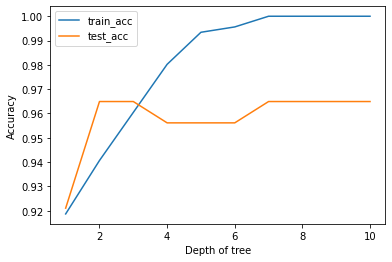

In [8]:
plt.plot(frame['max_depth'], frame['train_acc'], label = 'train_acc')
plt.plot(frame['max_depth'], frame['test_acc'], label = 'test_acc')
plt.xlabel("Depth of tree")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Pruning
Cost complexity pruning provides an option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. We will use this inbuilt parameter to prune the Decision Trees formed.
For more details see https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning

In [9]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [10]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)


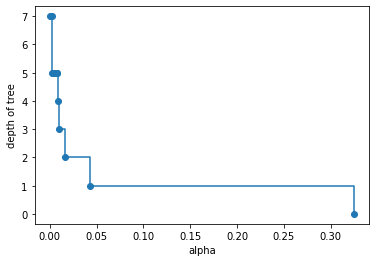

In [11]:
depth = [clf.tree_.max_depth for clf in clfs]
plt.plot(ccp_alphas, depth, marker='o',drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("depth of tree")
plt.show()

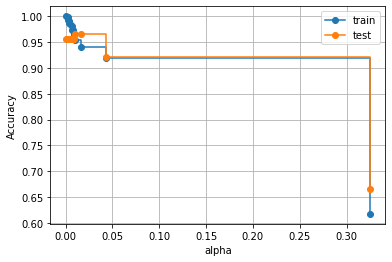

In [12]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

plt.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
plt.grid()
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.02)
clf = clf.fit(x_train,y_train)

In [14]:
pred=clf.predict(x_test)
print(metrics.accuracy_score(y_test, pred))

0.9649122807017544


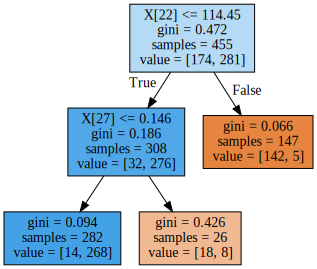

In [15]:
import graphviz
dot_data = tree.export_graphviz(clf, filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph